# Exploratory Data Analysis of T-Series from YouTube

## Contents
1. Introduction
2. Objectives
3. Steps involved 
4. Data acquisition
5. Data Preprocessing
6. EDA
7. Conclusions

## 1. Introduction
Have you ever wondered how YouTube Analytics works? How a Youtube channel grows? How a youtuber creates content related to trending topics? How YouTube shows trending videos? How to check your channel’s progress? How to check the statistics namely subscribers, views, comments, etc.) of any channel?

So, let's answer these questions through data.

In this project, we shall explore the statistics of T-Series channel.

## 3. Steps involved
1. Extract video meta data via Youtube API for the interested tech channels 
    * Get creditionals from API
    * Request data
    * Transforming it into dataframe  
2. Data Preprocessing
3. Exploratory data analysis
4. Conclusions & insights

## 4. Data Acquisition

Import required packages 

In [7]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Here is the [Google Developers Console guide](https://developers.google.com/youtube/v3/getting-started)

In [8]:
api_key='APIKEY'

In [9]:
channel_ids = ['UCq-Fj5jknLsUf-MWSy4_brA'] # tseries

In [10]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)
   

In [11]:
def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids
    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [12]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [13]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,T-Series,269000000,260669850613,21362,UUq-Fj5jknLsUf-MWSy4_brA


In [14]:
playlist_id='UUq-Fj5jknLsUf-MWSy4_brA'

In [15]:
video_ids = get_video_ids(youtube, playlist_id)

In [16]:
len(video_ids)

20000

In [17]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,oQktLPdn30I,T-Series,"Srikanth Scene #4: ""Srikanth's Hilarious Speec...","Presenting Srikanth Scene #4: ""Srikanth's Hila...","[tseries, tseries songs, srikanth movie, srika...",2024-07-14T13:30:02Z,37400,1095,None,102,PT9M5S,hd,false
1,3kmUS5HlNNc,T-Series,"Zor Ki Barsaat Hui (Song): Jubin Nautiyal, Roc...","This Monsoon, Witness the Love In Its True Sen...","[hindi songs new, bollywood songs 2024, tserie...",2024-07-14T12:14:04Z,8,33176,None,5826,None,hd,false
2,XqhT42t90VQ,T-Series,"Srikanth Scene #3: ""Srikanth Goes to the Blind...","Presenting Srikanth Scene #3: ""Srikanth Goes t...","[tseries, tseries songs, srikanth movie rajkum...",2024-07-14T12:04:52Z,2093,76,None,21,PT2M42S,hd,false
3,hnXVDMB7R6A,T-Series,Tere Naina Maar Hi Daalenge (LoFi Mix): Salman...,Presenting “Tere Naina Maar Hi Daalenge (LoFi ...,"[hindi songs 2024, bollywood songs 2024, bolly...",2024-07-14T08:34:44Z,19258,868,None,93,PT4M38S,hd,false
4,UWcfOVeB45E,T-Series,Wild Wild Punjab: I Am Over You (Lyrics) Varun...,"Presenting the Lyrical Video Song ""I Am Over Y...","[hindi songs 2024, hindi songs new, bollywood ...",2024-07-14T05:30:33Z,54341,1344,None,174,PT3M10S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,cdYC7O8HN6w,T-Series,Tumse Yu Milenge Full Song | Ankahee | Aaftab ...,Subscribe our channel http://www.youtube.com/t...,"[Ankahee, Tumse Yu Milenge, Kunal Ganjawala, P...",2011-05-20T08:08:03Z,515621,6424,None,230,PT3M12S,hd,false
19996,i_S0_QJd50s,T-Series,Loot Jayenge- Remix [Full Song] Aksar,Song - Loot Jayenge- Remix\nFilm - Aksar\nSing...,"[Aksar, Loot Jayenge- Remix, Kunal Ganjawala, ...",2011-05-20T08:05:52Z,16673808,60359,None,1404,PT4M15S,hd,false
19997,1CkUHY9hkhY,T-Series,O Priya Priya [Full Song] Zakhmi Dil Vol.2,Song - O Priya Priya\nFilm - Zakhmi Dil Vol.2\...,"[O Priya Priya, ries, latest songs, O Priya Pr...",2011-05-20T08:04:47Z,8645217,9457,None,265,PT6M15S,sd,false
19998,_sSEmcauVak,T-Series,Achchha Sila Diya Tune [Full Song] Zakhmi Dil ...,Song - Achchha Sila Diya Tune\nFilm - Bewafa S...,"[Zakhmi Dil Vol.2, Bewafa Sanam, Achchha Sila ...",2011-05-20T08:04:44Z,240493,419,None,24,PT5M52S,sd,false


## 5. Data Preprocessing

In [18]:
video_df.describe()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
count,20000,20000,20000,20000,19937,20000,20000,19986,0,19984,19999,20000,20000
unique,20000,1,19891,18594,15219,19847,19752,12604,0,4652,1505,2,2
top,oQktLPdn30I,T-Series,Don 2 *Shahrukh Khan* Don Dialogue Promo,,"[hindi songs, 2021 hindi songs, new hindi song...",2023-06-28T13:32:21Z,0,8,NaN,2,PT30S,hd,false
freq,1,20000,4,263,962,7,8,24,NaN,212,426,18090,19775


In [19]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        20000 non-null  object
 1   channelTitle    20000 non-null  object
 2   title           20000 non-null  object
 3   description     20000 non-null  object
 4   tags            19937 non-null  object
 5   publishedAt     20000 non-null  object
 6   viewCount       20000 non-null  object
 7   likeCount       19986 non-null  object
 8   favouriteCount  0 non-null      object
 9   commentCount    19984 non-null  object
 10  duration        19999 non-null  object
 11  definition      20000 non-null  object
 12  caption         20000 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [20]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration           True
definition        False
caption           False
dtype: bool

In [21]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Dataframe contains viewcount,likecount,favouritecount,commentcount,duration columns in string format. Let's convert them to numeric format.

In [22]:
cols=['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[cols]=video_df[cols].apply(pd.to_numeric,errors='coerce',axis=1)

Day of week video published 

In [23]:
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [ ]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [ ]:
video_df[['durationSecs', 'duration']] 

In [ ]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df

## 6. Exploratory Data Analysis

### Ranking most viewed videos

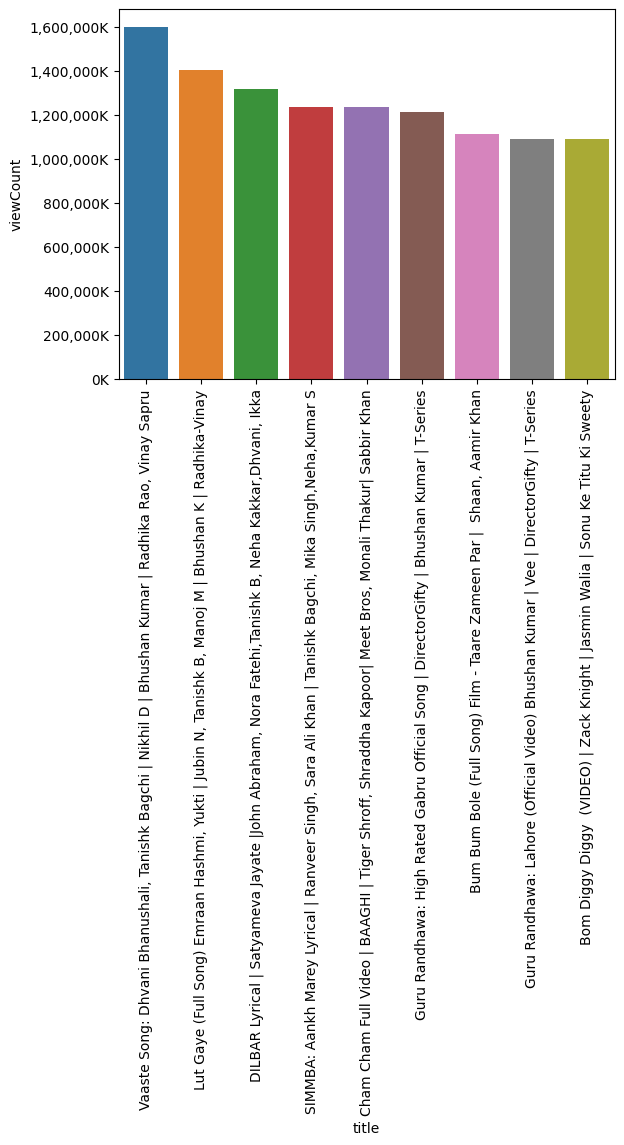

In [27]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Least watched videos

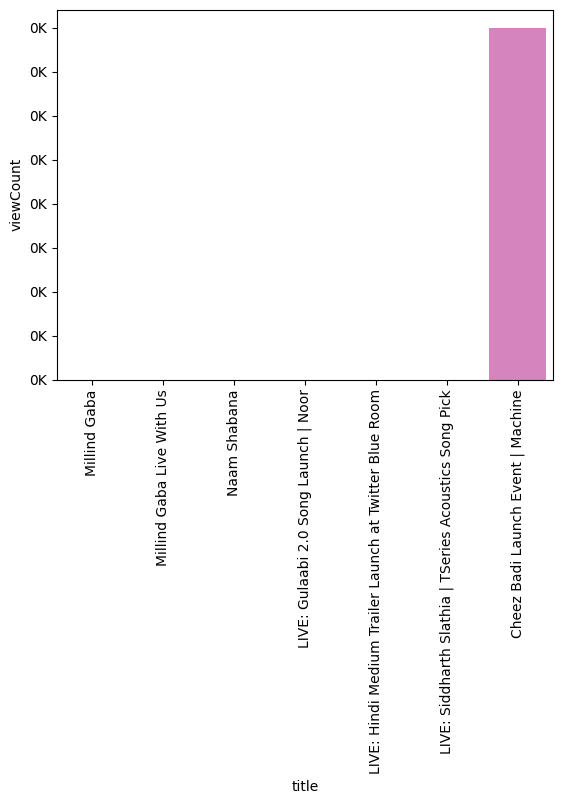

In [28]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Distribution of views across the channel

Text(0.5, 0, '')

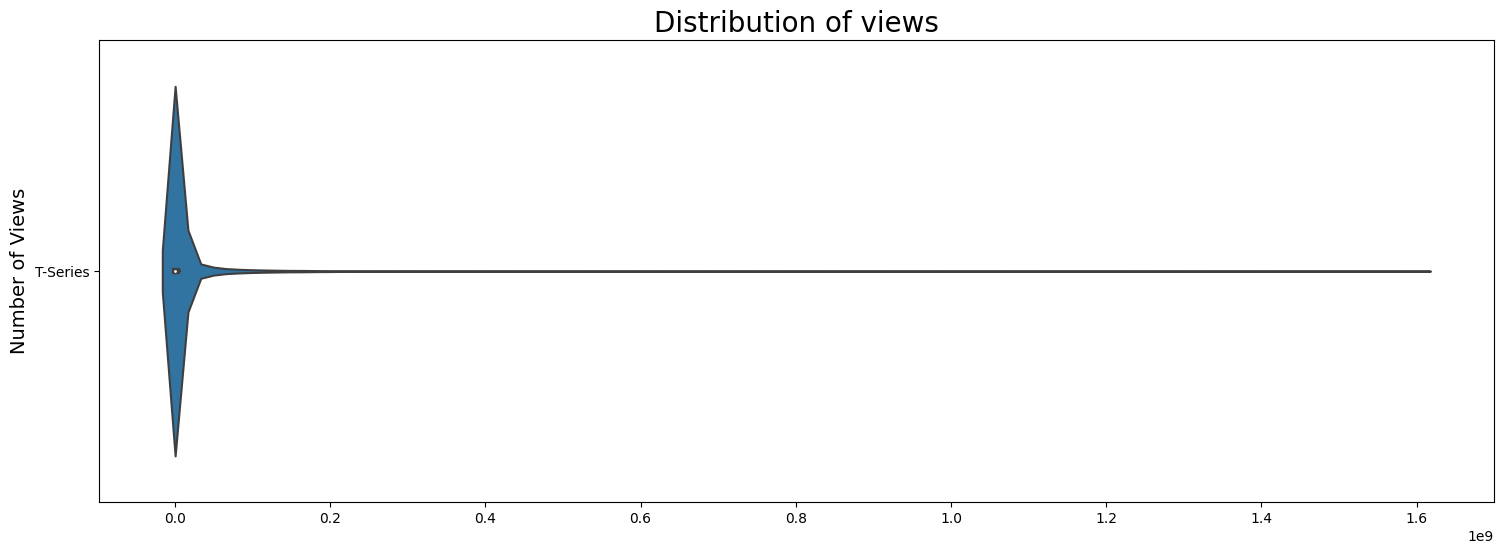

In [29]:
plt.figure(figsize=(18,6),dpi=100)
sns.violinplot(y='channelTitle', x='viewCount',data=video_df)
plt.title('Distribution of views',fontsize=20)
plt.ylabel('Number of Views',fontsize=14)
plt.xlabel('')

Views vs. likes and comments

<AxesSubplot: xlabel='likeCount', ylabel='viewCount'>

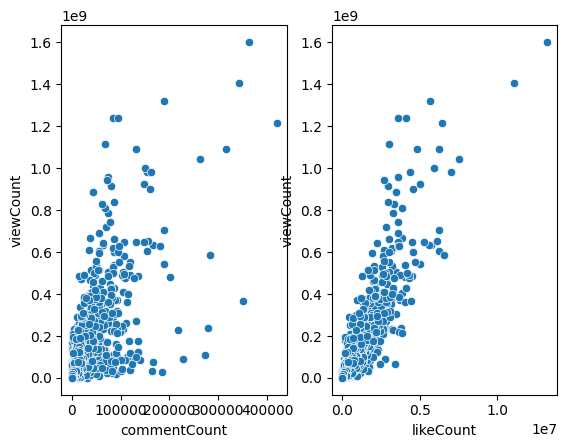

In [30]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

Video duration

In [ ]:
plt.figure(dpi=200)
sns.histplot(data = video_df.durationSecs[video_df['durationSecs']<400], bins=30)

In [ ]:
video_df.durationSecs[video_df['durationSecs']<480].count()

16201

In [ ]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

In [ ]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,DU8jWVbvVVU,T-Series,"Chand Nikla Video | Ujda Chaman | Sunny Singh,...","Presenting the first video song ""Chand Nikla ""...","[Songs 2019, Songs, tseries songs, new songs 2...",2019-10-09 10:32:41+00:00,3094071.0,51462.0,NaN,1890.0,PT2M15S,hd,false,Wednesday,135.0,26
1,RqLU1lYygFI,T-Series,Song Teaser: Tujhe Paane Ko | Feat. Shalin Bha...,Presenting the teaser of the new song Tujhe Pa...,"[t-series songs, tseries offical channel, Song...",2019-10-09 08:34:12+00:00,1041934.0,17258.0,NaN,528.0,PT21S,hd,false,Wednesday,21.0,19
2,huXCTt-lYzs,T-Series,So Gaya Yeh Jahan Video | Bypass Road | Neil N...,"Presenting the video song ""So Gaya Yeh Jahan"" ...","[hindi songs, Songs, ries, Songs 2019, film so...",2019-10-09 06:35:39+00:00,74922403.0,638442.0,NaN,10793.0,PT2M27S,hd,false,Wednesday,147.0,24
3,e5mHno7V2Fo,T-Series,Marjaavaan: Ek Toh Kum Zindagani Teaser | Nora...,"Presenting the teaser of the upcoming song ""Ek...","[latest hindi songs, tseries songs, ries, new ...",2019-10-08 09:39:38+00:00,3997842.0,86384.0,NaN,2917.0,PT17S,hd,false,Tuesday,17.0,21
4,yXbf73bemZY,T-Series,"Phulkari Video Song | Daaka | Gippy Grewal, Za...","Presenting the first video song ""Phulkari "" f...","[Songs 2019, Songs, tseries songs, new songs 2...",2019-10-08 05:31:17+00:00,5958197.0,78962.0,NaN,2432.0,PT2M12S,hd,false,Tuesday,132.0,27


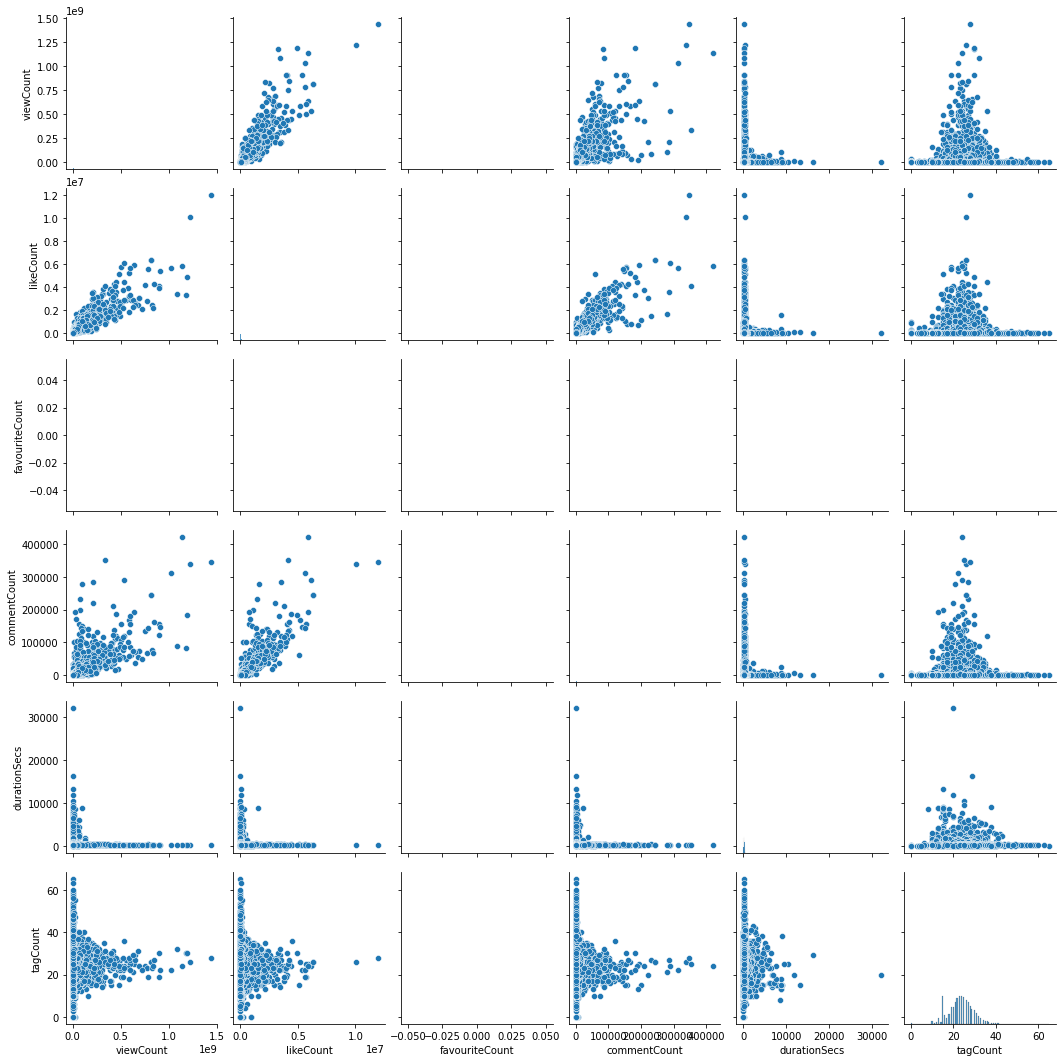

In [ ]:
sns.pairplot(video_df)